# Predicting the temperature of water based on its salinity

In [39]:
import pandas as pd #for handling data and dataframe
import seaborn as sns #for plotting different curves and graphs
import numpy as np #for algebraic manipulation of the datasets
import matplotlib.pyplot as plt

## Loading the data set


In [235]:
df=pd.read_csv("../input/calcofi/bottle.csv", low_memory=False) #df.count() use this to count the no of items column wise in the datset. There is a total of 864863 elements
df.head() #first five rows of the dataset will be returned


ParserError: Error tokenizing data. C error: out of memory

### selecting temperature(T_degC) and salinity(Salnty) columns to evaluate further

In [ ]:
df=df[['Salnty','T_degC']]
df


## Ploting a scatterplot graph to visualize the data

In [ ]:
ax=sns.scatterplot(x=df.Salnty, y=df.T_degC)
ax.set(title='temperature versus salinity graph')

## Dealing with the missing data

In [43]:
df.isnull().sum()   #finds the number of missing values in the dataset

Salnty    47354
T_degC    10963
dtype: int64

In [184]:
#using simple imputer function we fill the missing data with the mean value of the attribute 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
imputer.fit(df)
df = imputer.transform(df)
df

array([[33.44  , 10.5   ],
       [33.44  , 10.46  ],
       [33.437 , 10.46  ],
       ...,
       [33.415 , 18.692 ],
       [33.4062, 18.161 ],
       [33.388 , 17.533 ]])

## Creating the indepent(x) and dependent (y) variables


In [185]:
X=df[:,0].reshape(-1, 1) #obtaining the first column
Y=df[:,1]#obtaining the second column
print(X)
print(Y)

[[33.44  ]
 [33.44  ]
 [33.437 ]
 ...
 [33.415 ]
 [33.4062]
 [33.388 ]]
[10.5   10.46  10.46  ... 18.692 18.161 17.533]


## Splitting the dataset into train and test

In [236]:
from sklearn.model_selection import train_test_split #to split the data set into tainh test data
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size = 0.25, random_state = 0) #test_size=0.2 implies that the test part of the data will be 20%

In [237]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[35.18 ]
 [33.664]
 [33.95 ]
 ...
 [34.13 ]
 [34.172]
 [34.05 ]]
[[33.672]
 [33.738]
 [34.   ]
 ...
 [34.21 ]
 [33.479]
 [34.23 ]]
[18.62 14.16  7.82 ...  8.24  6.28  6.71]
[16.26 10.68 18.02 ...  7.17 16.32  5.86]


## Using the training part of the data to train the simple regression model

In [238]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

# Predicting the test results 

In [239]:
y_pred = reg.predict(X_test)
y_pred

array([11.57413948, 11.27000506, 10.0626836 , ...,  9.0949832 ,
       12.46350223,  9.00282126])

# Visualizing the trained data 

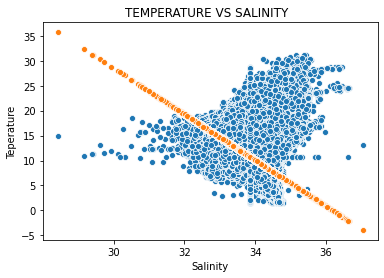

In [240]:
ax=sns.scatterplot(X_train.reshape((-1)),y_train) #creates a graph of train data temperature vs salinity 
ax.set(xlabel="Salinity",ylabel='Teperature',title='TEMPERATURE VS SALINITY  ')
sns.scatterplot(x=X_train.reshape((-1)),y=reg.predict(X_train))#creates a graph of salinity and temperature. Here temperature value is predicted using salinity(train).the points therefore lie on a regression line


## Effeciency of the model

In [241]:
# regression coefficients
print('Coefficients:',reg.coef_)
# regression intercept
print('Intercept:' ,reg.intercept_)

Coefficients: [-4.60809717]
Intercept: 166.73798739229252


In [242]:
#variance score or the R-squared value: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.2384918895519471
